In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.preprocessing.image import ImageDataGenerator

2023-05-04 12:22:29.607489: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-04 12:22:29.735816: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-04 12:22:29.739007: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 12:22:32.114317: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow import transpose
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
(X_train,y_train),(X_test,y_test)  = mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
X_train = X_train.reshape((X_train.shape[0],28,28))
X_test = X_test.reshape((X_test.shape[0],28,28))

In [7]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
# convert data to 3 channels
X_train = np.stack((X_train,)*3,axis =-1)
X_test = np.stack((X_test,)*3,axis=-1)

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [9]:
# Create a data generator for data augmentation
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,      # randomly rotate the images by up to 10 degrees
    zoom_range=0.3,         # randomly zoom the images by up to 10%
    width_shift_range=0.2,  # randomly shift the images horizontally by up to 10%
    height_shift_range=0.15, # randomly shift the images vertically by up to 10%
    horizontal_flip=True,   # randomly flip the images horizontally
    vertical_flip=False,    # don't randomly flip the images vertically
    fill_mode='reflect'     # fill any empty pixels with the nearest value
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = datagen.flow(X_train,y_train, batch_size = 11000,shuffle = True)

val_iterator = val_generator.flow(X_test, y_test, batch_size = 5000,shuffle=False)



In [10]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [11]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling='avg',weights = "imagenet"))
model.add(Dense(512, activation  = "relu"))
model.add(Dense(10, activation = "softmax"))

model.layers[0].trainable = False

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Train the model with 20 epochs
history = model.fit(train_iterator,
    epochs=10,
    validation_data=val_iterator
)

Epoch 1/10


2023-05-04 12:22:48.389708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-04 12:23:05.622616: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720896000 exceeds 10% of free system memory.


1/6 [====>.........................] - ETA: 5:04 - loss: 2.7867 - accuracy: 0.0895

2023-05-04 12:23:50.774742: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720896000 exceeds 10% of free system memory.


3/6 [==============>...............] - ETA: 1:12 - loss: 2.5405 - accuracy: 0.1090

2023-05-04 12:24:46.002346: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720896000 exceeds 10% of free system memory.


4/6 [===================>..........] - ETA: 1:01 - loss: 2.5056 - accuracy: 0.1286

2023-05-04 12:25:23.168046: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720896000 exceeds 10% of free system memory.


5/6 [========================>.....] - ETA: 32s - loss: 2.4744 - accuracy: 0.1422 

2023-05-04 12:26:01.049125: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720896000 exceeds 10% of free system memory.


6/6 [==============================] - ETA: 0s - loss: 2.4355 - accuracy: 0.1508 

2023-05-04 12:26:30.184317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


6/6 [==============================] - 265s 41s/step - loss: 2.4355 - accuracy: 0.1508 - val_loss: 2.1249 - val_accuracy: 0.2703
Epoch 2/10
6/6 [==============================] - 237s 39s/step - loss: 2.1652 - accuracy: 0.2199 - val_loss: 1.9760 - val_accuracy: 0.4343
Epoch 3/10
6/6 [==============================] - 181s 33s/step - loss: 2.0531 - accuracy: 0.2708 - val_loss: 1.8475 - val_accuracy: 0.3959
Epoch 4/10
6/6 [==============================] - 183s 30s/step - loss: 1.9856 - accuracy: 0.3120 - val_loss: 1.7771 - val_accuracy: 0.4869
Epoch 5/10
6/6 [==============================] - 189s 30s/step - loss: 1.9280 - accuracy: 0.3368 - val_loss: 1.6797 - val_accuracy: 0.4690
Epoch 6/10
6/6 [==============================] - 180s 29s/step - loss: 1.8791 - accuracy: 0.3531 - val_loss: 1.6265 - val_accuracy: 0.5256
Epoch 7/10
6/6 [==============================] - 171s 28s/step - loss: 1.8432 - accuracy: 0.3677 - val_loss: 1.5579 - val_accuracy: 0.5368
Epoch 8/10
6/6 [===============

In [15]:
# generate a batch of augmented data
X_augmented_train, y_augmented_train = next(train_iterator)

# concatenate the augmented data with the original training data
X_train = np.concatenate((X_train, X_augmented_train))
y_train = np.concatenate((y_train, y_augmented_train))

In [16]:
# generate a batch of augmented data
X_augmented_test, y_augmented_test = next(val_iterator)

# concatenate the augmented data with the original training data
X_test = np.concatenate((X_test, X_augmented_test))
y_test = np.concatenate((y_test, y_augmented_test))

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)

469/469 [==============================] - 45s 95ms/step - loss: 12.5145 - accuracy: 0.2732


In [18]:
y_pred = model.predict(X_test)

469/469 [==============================] - 47s 97ms/step


In [19]:
y_pred_classes = np.argmax(y_pred, axis = 1)

In [20]:
y_true = y_test.astype(int).tolist()

In [21]:
confusion = confusion_matrix(y_true, y_pred_classes)
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.13      0.96      0.23      1440
           1       0.82      0.50      0.62      1706
           2       0.51      0.22      0.31      1562
           3       0.57      0.21      0.30      1510
           4       0.70      0.04      0.08      1482
           5       0.37      0.01      0.03      1348
           6       0.70      0.16      0.27      1420
           7       0.58      0.23      0.33      1540
           8       0.44      0.11      0.18      1463
           9       0.49      0.23      0.32      1529

    accuracy                           0.27     15000
   macro avg       0.53      0.27      0.27     15000
weighted avg       0.54      0.27      0.28     15000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


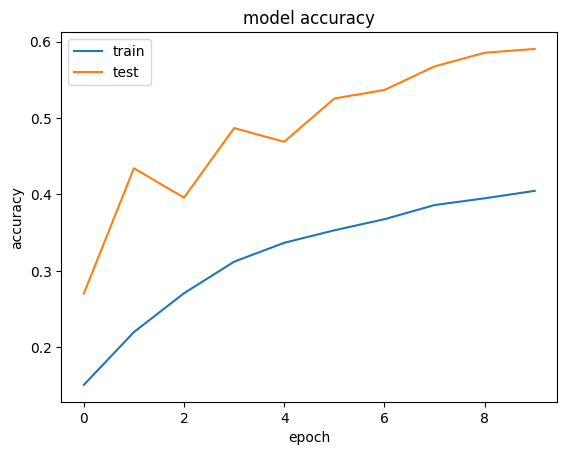

In [22]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Save the entire model to a HDF5 file
model.save("modail_resnet.h5")